# Project 2: NYC Airbnb price prediction using Multiple Regression Analysis.

### <i> Data: Airbnb New York City Dataset <i>

<b> Description </b>: The objective of this project is to showcase the skills related to data preprocessing, exploratory data analysis and multiple regression model building and tuning. </br> The <a href="https://www.kaggle.com/datasets/arsalanzeb94/airbnb-new-york-city-dataset">dataset</a> was taken from Kaggle and contains data related to Airbnb listings in New York City for June-July 2022 (most recent).

In the first section, I preprocess the data, which includes data cleaning, exploratory data analysis, feature engineering, viualisation and more. <br> In the second section, I build, train and test three different regression models:
- Random forest regressor
- Gradient boosting regressor
- KNN regressor

# 1. Data Preprocessing

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the file
df = pd.read_csv('airbnb_nyc.csv')

## 1.1. Data Cleaning

#### Examine the dataset

In [31]:
df.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,225,30,48,2019-11-04,0.31,3,308,0
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.32,2,365,0
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,21,2,2021-08-08,0.02,1,250,1
3,5178,Large Furnished Room Near B'way?€€,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,536,2022-05-09,3.37,1,172,62
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,2017-07-21,0.76,1,0,0
5,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Morningside Heights,40.803160,-73.963870,Entire home/apt,135,30,56,2021-08-22,0.35,2,30,1
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Laurie,Brooklyn,South Slope,40.668010,-73.987840,Private room,118,4,211,2022-05-18,1.32,3,312,26
7,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,84,30,184,2022-02-20,1.16,1,227,4
8,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.723640,-73.950130,Entire home/apt,75,30,3,2019-10-30,0.02,1,0,0
9,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65,30,0,NaN,NaN,2,334,0


In [32]:
df.shape

(37410, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37410 non-null  int64  
 1   name                            37394 non-null  object 
 2   host_id                         37410 non-null  int64  
 3   host_name                       37343 non-null  object 
 4   neighbourhood_group             37410 non-null  object 
 5   neighbourhood                   37410 non-null  object 
 6   latitude                        37410 non-null  float64
 7   longitude                       37410 non-null  float64
 8   room_type                       37410 non-null  object 
 9   price                           37410 non-null  int64  
 10  minimum_nights                  37410 non-null  int64  
 11  number_of_reviews               37410 non-null  int64  
 12  last_review                     

In [34]:
len(df[df["availability_365"] == 0])

14204

As far as I understand, the 'availability_365' column represents the number of days that an apartment had been available for the last twelve months as of the date when the data was collected. This is why some apartments, even though they have listings, get 0 availability - it should be considered during the data analysis part.

#### Drop unnecessary columns

In [35]:
airbnb = df.drop(columns=["name", "host_id", "host_name", "last_review", "number_of_reviews_ltm"])

airbnb.head(50)

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,225,30,48,0.31,3,308
1,5121,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.32,2,365
2,5136,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,21,2,0.02,1,250
3,5178,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,536,3.37,1,172
4,5203,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,0.76,1,0
5,5295,Manhattan,Morningside Heights,40.803160,-73.963870,Entire home/apt,135,30,56,0.35,2,30
6,5803,Brooklyn,South Slope,40.668010,-73.987840,Private room,118,4,211,1.32,3,312
7,6848,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,84,30,184,1.16,1,227
8,74860,Brooklyn,Greenpoint,40.723640,-73.950130,Entire home/apt,75,30,3,0.02,1,0
9,6872,Manhattan,East Harlem,40.801070,-73.942550,Private room,65,30,0,NaN,2,334


In [36]:
airbnb.isnull().sum()

id                                   0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7949
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Remove the NaN values from the dataset

In [37]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the rows that have 0 in 'price' column

In [38]:
(airbnb['price']==0).sum()

32

In [39]:
airbnb.drop(airbnb[airbnb['price'] == 0].index, inplace=True)

#### Removing outliers from the target variable

In [40]:
airbnb['price'].describe()

count    37378.000000
mean       190.938547
std        342.592816
min         10.000000
25%         75.000000
50%        125.000000
75%        204.000000
max      12900.000000
Name: price, dtype: float64

Looking at basic descriptive statistics, it is clear that the value distribution in the 'price' column is severly skewed, which can worsen the results of the model. <br> In order to remove outliers, I use the logarithm transformation method that aims at reducing the impact of extreme values, making them more representative of the central tendency of the data.

In [41]:
log_col = np.log(airbnb['price'])
airbnb['price'] = log_col

airbnb['price'].describe()

count    37378.000000
mean         4.878377
std          0.771008
min          2.302585
25%          4.317488
50%          4.828314
75%          5.318120
max          9.464983
Name: price, dtype: float64

<i>Note</i>: a downside of this transformation is that price values become less intuitive to interprete, however, for the purpose of my project, it doesn't have much of a negative impact on the data analysis or final results.

#### Save cleaned dataset

In [42]:
airbnb.to_csv("airbnb_nyc_cleaned.csv", index=False)

## 1.2. Exploratory Data Analysis

In [43]:
airbnb.shape

(37378, 12)

### 1.2.1. Examine numeric variables

In [44]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.737800e+04,37378.000000,37378.000000,37378.000000,37378.000000,37378.000000,37378.000000,37378.000000,37378.000000
mean,6.105658e+16,40.729300,-73.946144,4.878377,19.772299,26.322275,0.917781,15.126652,119.807373
std,1.806738e+17,0.058054,0.056710,0.771008,32.781763,54.962064,1.707343,50.737377,132.768959
min,2.595000e+03,40.504560,-74.269520,2.302585,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.468780e+07,40.688243,-73.983500,4.317488,2.000000,1.000000,0.020000,1.000000,0.000000
50%,3.481008e+07,40.724870,-73.953750,4.828314,30.000000,5.000000,0.240000,1.000000,60.000000
75%,5.019526e+07,40.763382,-73.926310,5.318120,30.000000,25.000000,1.180000,3.000000,254.000000
max,6.410000e+17,40.928340,-73.693210,9.464983,1250.000000,1419.000000,81.260000,391.000000,365.000000


#### Correlation between different numeric variables

<Axes: >

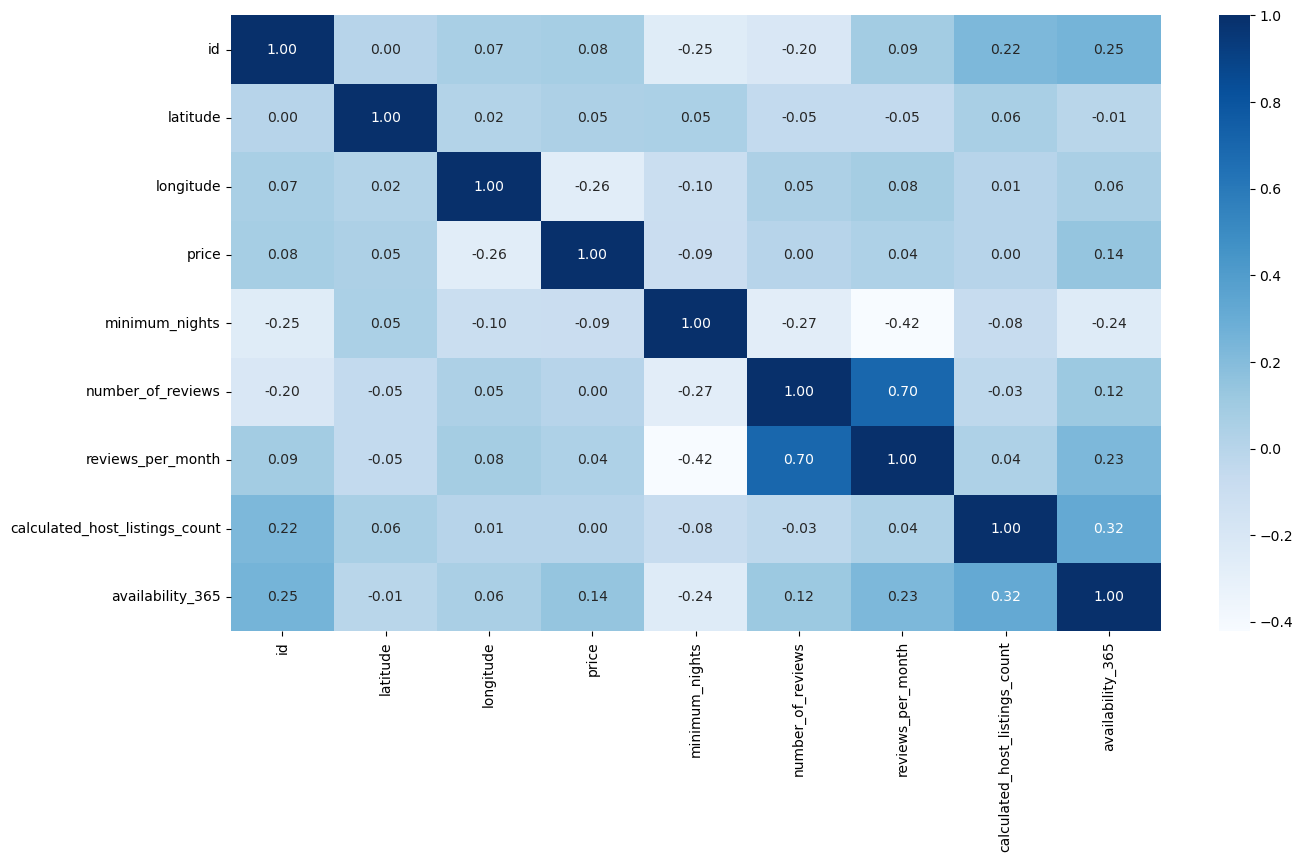

In [45]:
correlation = airbnb.corr(method='kendall', numeric_only=True)

plt.figure(figsize=(15,8))
sns.heatmap(correlation, fmt='.2f', annot=True, cmap='Blues')

The strongest correlations that we can spot here are: 
- positive correlation (0.7) between 'reviews_per_month' and 'number_of_reviews', which makes perfect sense.
- negative corelation (-0.42) between 'minimum-nights' and 'reviews per month', which means that as the number of minimum days that visitors can rent an apartment for increase, the number of reviews per month decreases, which also makes.

However, in general, the correlation between numeric variables and the target (price) is quite weak.

### 1.2.2. Examine non-numeric variables

### Main characteristics

In [46]:
airbnb.select_dtypes(include=['object']).columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [47]:
room_type = airbnb["room_type"].value_counts()
room_type

Entire home/apt    21094
Private room       15603
Shared room          518
Hotel room           163
Name: room_type, dtype: int64

In [48]:
neighbourhood_group = airbnb["neighbourhood_group"].value_counts()
neighbourhood_group

Manhattan        15829
Brooklyn         13950
Queens            5823
Bronx             1375
Staten Island      401
Name: neighbourhood_group, dtype: int64

In [49]:
neighbourhood = airbnb["neighbourhood"].value_counts()

neighbourhood

Bedford-Stuyvesant    2593
Williamsburg          2388
Harlem                1818
Upper West Side       1536
Midtown               1530
                      ... 
Woodrow                  1
Westerleigh              1
Bull's Head              1
Rossville                1
Bloomfield               1
Name: neighbourhood, Length: 243, dtype: int64

### Comparison of listing prices accross the five NYC neighbourhood groups

In [50]:
pd.pivot_table(airbnb, values='price', index='neighbourhood_group', columns='room_type', aggfunc=np.mean)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Bronx,4.913213,NaN,4.189030,3.812386
Brooklyn,5.136385,5.484228,4.248680,3.877353
Manhattan,5.403359,5.936893,4.744222,4.524193
Queens,5.028336,5.165221,4.168172,4.007833
Staten Island,4.944073,NaN,4.269761,NaN


### ANOVA f-test and Post-hoc

We use analysis of variance (ANOVA) technique to determine whether a categorical variable has significant influence on the numerical target variable, price. It is done by determining whether the means for two or more samples of data come from the same distribution.

Hypothesis: 

H<sub>0</sub>: µ<sub>1</sub>= µ<sub>2</sub>=...= µ<sub>k</sub>

H<sub>1</sub>: there is at least one population mean that differs from the rest.


- <i><b> Price and Neighbourhood Group </i>

First, we need to study whether there is a relationship between price and neighbourhood group features.

We create 4 price groups with the most representative neighbourhoods, while Staten Island is removed.  Since the neighbourhood groups don't have the same size of data, we create random samples of the size of 500 for each and then perform the ANOVA f-test.

In [51]:
from scipy.stats import f_oneway

data_manhattan = airbnb[airbnb['neighbourhood_group']=='Manhattan'][['neighbourhood_group','price']]
data_brooklyn = airbnb[airbnb['neighbourhood_group']=='Brooklyn'][['neighbourhood_group','price']]
data_queens = airbnb[airbnb['neighbourhood_group']=='Queens'][['neighbourhood_group','price']]
data_bronx = airbnb[airbnb['neighbourhood_group']=='Bronx'][['neighbourhood_group','price']]

s1 = data_manhattan.sample(n=500).price.to_list()
s2 = data_brooklyn.sample(n=500).price.to_list()
s3 = data_queens.sample(n=500).price.to_list()
s4 = data_bronx.sample(n=500).price.to_list()

f_value, p_value = f_oneway(s1, s2, s3, s4)

# print the results
print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  85.38716179734467
p-value:  5.593867787950604e-52


The p_value is way smaller than 0.05, which means that we cannot accept H<sub>0</sub>, and that the categorical variable, neighbourhood feature, has significant influence on the target variable, price.

The next step is to perform <b>post-hoc</b> in order to further investigate pairwise differences among groups and avoid making false conclusions about differences among groups. The post-hoc is done using T-test.

In [52]:
from scipy.stats import ttest_ind

groups = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx']
samples = [s1, s2, s3, s4]

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t_value, p_value = ttest_ind(samples[i], samples[j])
        print(f"T-test between {groups[i]} and {groups[j]}:")
        print(f"t-value: {t_value}, p-value: {p_value}")

T-test between Manhattan and Brooklyn:
t-value: 9.480473248315304, p-value: 1.783941172483797e-20
T-test between Manhattan and Queens:
t-value: 13.47960493905697, p-value: 3.6165047159926425e-38
T-test between Manhattan and Bronx:
t-value: 13.39900209945729, p-value: 9.095381434661131e-38
T-test between Brooklyn and Queens:
t-value: 4.201844621561368, p-value: 2.8845966316561906e-05
T-test between Brooklyn and Bronx:
t-value: 3.844211352967118, p-value: 0.00012859426573025876
T-test between Queens and Bronx:
t-value: -0.494299497923615, p-value: 0.6212034606344097


- <i><b> Price and Room Type </i>

Here, we work with 3 price groups for the different types of accomodations: entire home, private room and shared room. 'Hotel room' is left out.

In [53]:
data_home = airbnb[airbnb['room_type']=='Entire home/apt'][['room_type','price']]
data_private = airbnb[airbnb['room_type']=='Private room'][['room_type','price']]
data_shared = airbnb[airbnb['room_type']=='Shared room'][['room_type','price']]

s1 = data_home.sample(n=500).price.to_list()
s2 = data_private.sample(n=500).price.to_list()
s3 = data_shared.sample(n=500).price.to_list()

f_value, p_value = f_oneway(s1, s2, s3, s4)

# print the results
print("F-value: ", f_value)
print("p-value: ", p_value)

F-value:  226.6633879244111
p-value:  1.534621630493084e-126


In [54]:
groups = ['Entire home/apt', 'Private room', 'Shared room']
samples = [s1, s2, s3]

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t_value, p_value = ttest_ind(samples[i], samples[j])
        print(f"T-test between {groups[i]} and {groups[j]}:")
        print(f"t-value: {t_value}, p-value: {p_value}")

T-test between Entire home/apt and Private room:
t-value: 20.492983684002397, p-value: 3.5556381440699007e-78
T-test between Entire home/apt and Shared room:
t-value: 23.63628021970134, p-value: 1.9211045667889127e-98
T-test between Private room and Shared room:
t-value: 5.41102030859666, p-value: 7.84709019159169e-08


Again, we see that the 'room_type' feature has significant impct on the price.

### 1.2.3. Feature Visualization

#### a. Neighbourhood Groups

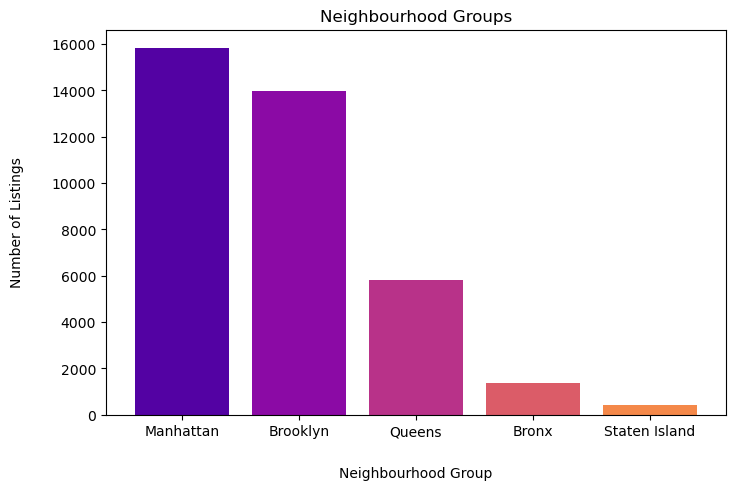

In [55]:
colors = sns.color_palette("plasma")
neighbourhood_group.plot.bar(color=colors, width=0.8, figsize=(8, 5))

plt.xlabel('Neighbourhood Group', labelpad=20)
plt.ylabel('Number of Listings', labelpad=20)
plt.title('Neighbourhood Groups')
plt.xticks(rotation=0)

plt.show()

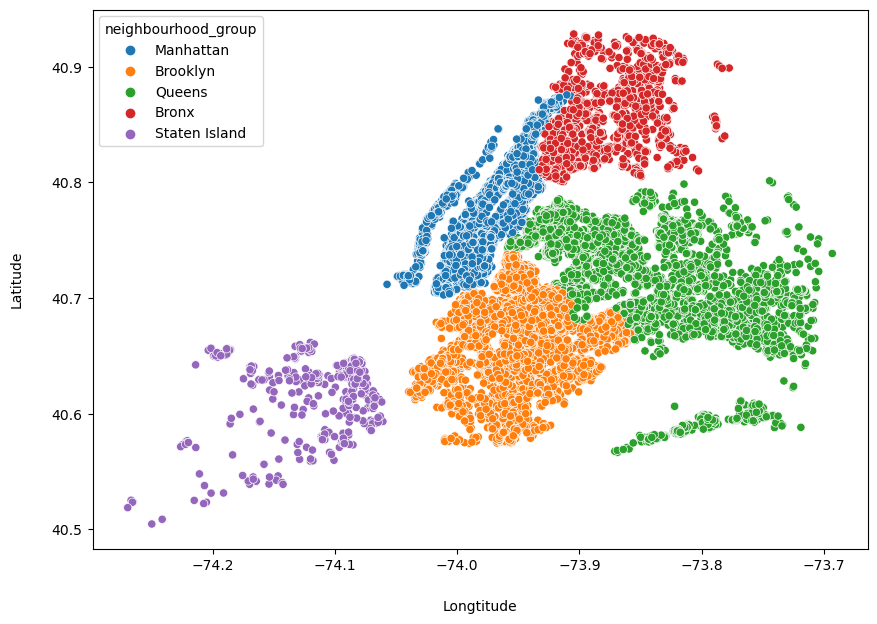

In [56]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.xlabel('Longtitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)

plt.show()

#### b. Neighbourhoods

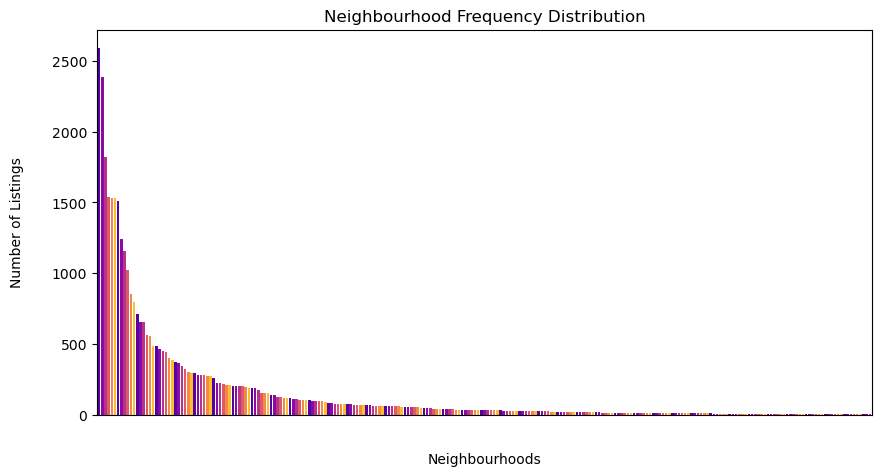

In [57]:
neighbourhood.plot.bar(color=colors, width=0.8, left=5, figsize=(10, 5))

plt.ylabel('Number of Listings', labelpad=20)
plt.xlabel('Neighbourhoods', labelpad=20)
plt.title('Neighbourhood Frequency Distribution')
plt.gca().set_xticklabels([])

# Remove x ticks
plt.tick_params(axis='x', which='both', bottom=False)
plt.show()

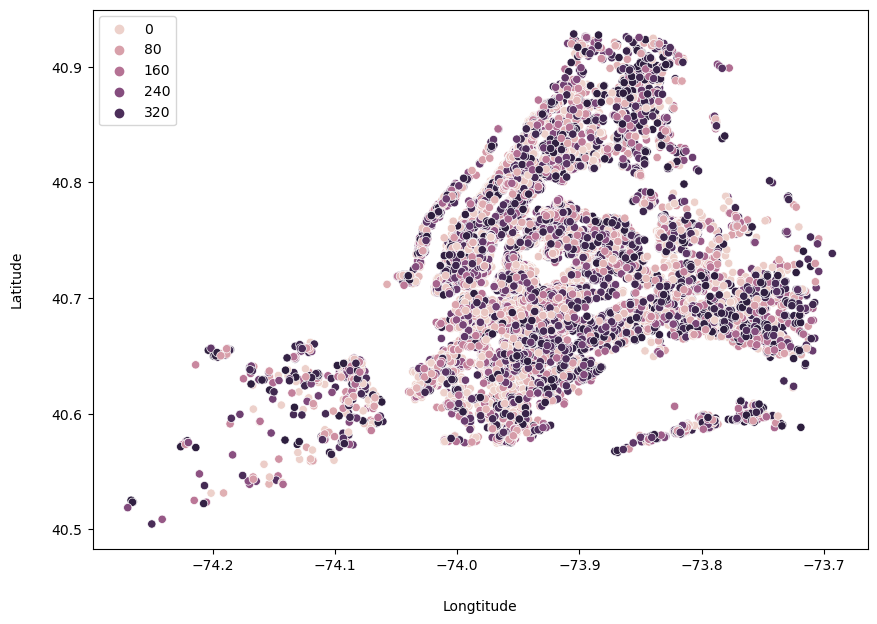

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=airbnb.availability_365)
plt.legend(loc='upper left')
plt.xlabel('Longtitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)

plt.show()

#### c. Room Types

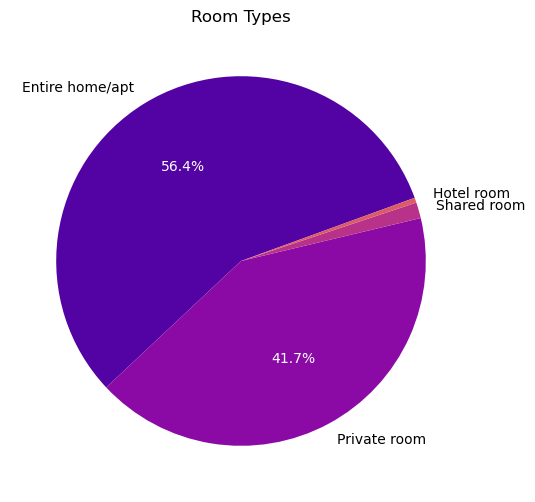

In [59]:
fig, ax = plt.subplots(figsize=(6, 6))
wedges, labels, autopct = ax.pie(room_type.values, labels=room_type.index, colors=colors, autopct='%1.1f%%', startangle=20)

# Empty the percentage labels for small pieces so they don't get cluttered
autopct[2].set_text('')
autopct[3].set_text('')

# Set the color of percentage labels to white
for label in autopct:
    label.set_color('white')

ax.set_title('Room Types')

plt.show()

#### d. Relationship between Neighbourhood Groups and Availability of Rooms

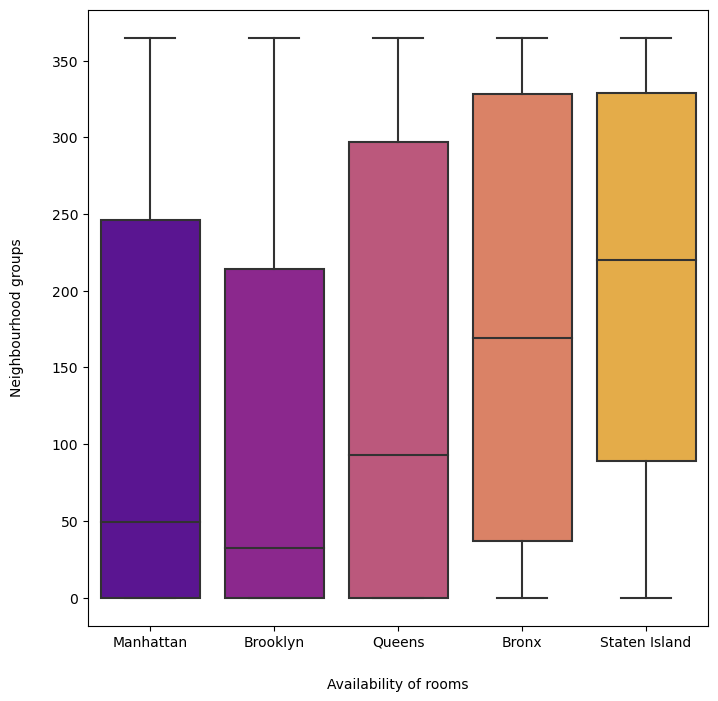

In [60]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group', y='availability_365', palette='plasma')
plt.xlabel('Availability of rooms', labelpad=20)
plt.ylabel('Neighbourhood groups', labelpad=20)

plt.show()

#### g. Price


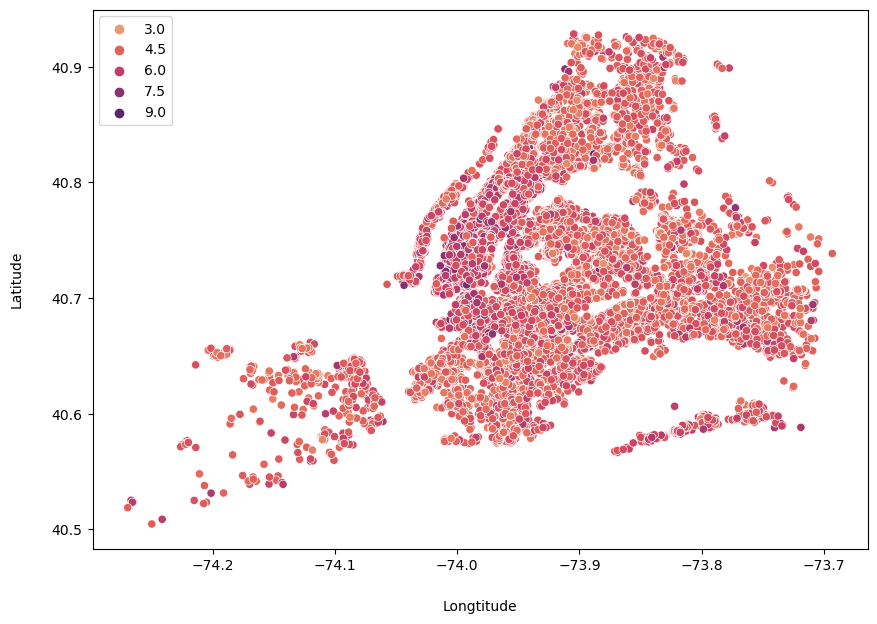

In [61]:
# Cut off outliers from the 'price' column so visualization makes sense
map_price = airbnb[airbnb['price'] < 350]['price']

plt.figure(figsize=(10,7))
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue=map_price, palette="flare")
plt.legend(loc='upper left')
plt.xlabel('Longtitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)

plt.show()

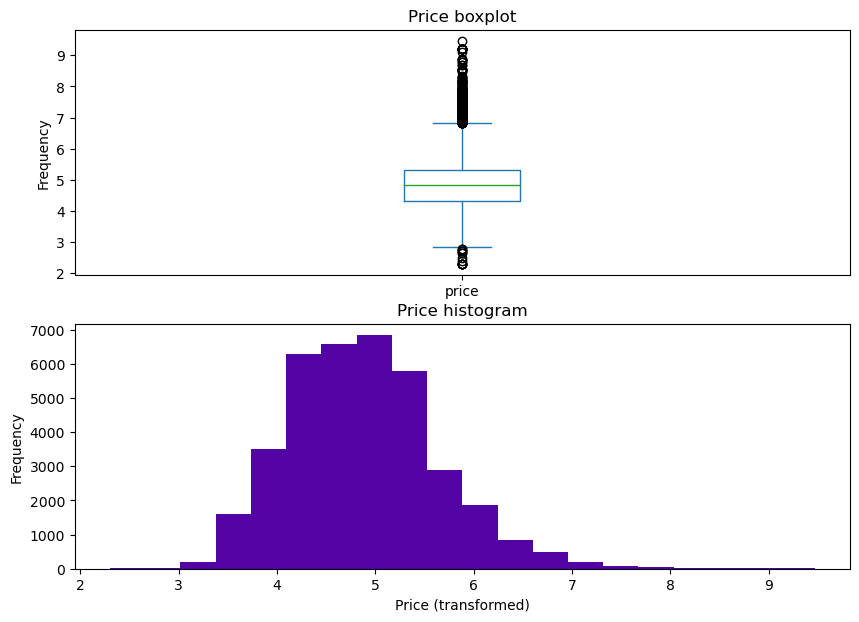

In [62]:
fig, axes = plt.subplots(2, figsize=(10,7))
airbnb['price'].plot.box(ax = axes[0], title='Price boxplot')
airbnb['price'].plot.hist(bins=20, ax=axes[1], title ='Price histogram', color=colors)
axes[1].set_xlabel('Price (transformed)')
axes[0].set_ylabel('Frequency')

plt.show()

## 1.3. Features Preprocessing

#### 1.3.1. Dropping the columns not needed for the model

In [63]:
airbnb_prep = airbnb.drop(['id', 'latitude','neighbourhood_group', 'longitude','number_of_reviews','reviews_per_month', 'calculated_host_listings_count'], axis=1)

airbnb_prep.head()

,neighbourhood,room_type,price,minimum_nights,availability_365
0,Midtown,Entire home/apt,5.416100,30,308
1,Bedford-Stuyvesant,Private room,4.094345,30,365
2,Sunset Park,Entire home/apt,5.616771,21,250
3,Midtown,Private room,4.219508,2,172
4,Upper West Side,Private room,4.317488,2,0


Note: the features that I dropped are either the ones that have weak-to-none correlation with the target, or are similar to other features.

#### 1.3.2. One-hot encoding and dimensionality reduction of categorical features

In order to convert categorical values to numerical, I use one-hot encoding technique.

In [64]:
airbnb_prep_enc = pd.concat([airbnb_prep.drop(['room_type'], axis=1),
                            pd.get_dummies(airbnb_prep[['room_type']])], axis=1)

airbnb_prep_enc.head()

,neighbourhood,price,minimum_nights,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,Midtown,5.416100,30,308,1,0,0,0
1,Bedford-Stuyvesant,4.094345,30,365,0,0,1,0
2,Sunset Park,5.616771,21,250,1,0,0,0
3,Midtown,4.219508,2,172,0,0,1,0
4,Upper West Side,4.317488,2,0,0,0,1,0


Previously, I made sure that the 'neighbourhood_group' has a significant impact on the target variable. However, in order to make my models way more precise I dropped the 'neighbourhood_group' feature and took a strongly correlated 'neighbourhood' feature to feed it to my models instead. In order to make it, first, I need to perform one-hot encoding to convert values to numerical type, and then the principal component analysis (PCA) in order to reduce the number of features.

In [65]:
from sklearn.decomposition import PCA

# Perform one-hot encoding 
one_hot = pd.get_dummies(airbnb_prep_enc['neighbourhood'])

# Perform PCA
pca = PCA(n_components=2)
pca_encoded = pca.fit_transform(one_hot)
airbnb_prep_enc['neighbourhood'] = pca_encoded

airbnb_prep_enc.head()

,neighbourhood,price,minimum_nights,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.059993,5.416100,30,308,1,0,0,0
1,0.881751,4.094345,30,365,0,0,1,0
2,-0.026593,5.616771,21,250,1,0,0,0
3,-0.059993,4.219508,2,172,0,0,1,0
4,-0.060357,4.317488,2,0,0,0,1,0


#### 1.3.3. Standardizing features

In [66]:
from sklearn.preprocessing import StandardScaler
import copy

scaler = StandardScaler().fit(airbnb_prep_enc[['minimum_nights', 'availability_365']])
airbnb_model = copy.deepcopy(airbnb_prep_enc)
airbnb_model[['minimum_nights', 'availability_365']] = scaler.transform(airbnb_prep_enc[['minimum_nights', 'availability_365']])

airbnb_model

,neighbourhood,price,minimum_nights,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.059993,-0.145148,0.311998,1.417463,1,0,0,0
1,0.881751,0.319540,0.311998,1.846786,0,0,1,0
2,-0.026593,-0.053564,0.037451,0.980608,1,0,0,0
3,-0.059993,-0.145148,-0.542147,0.393114,0,0,1,0
4,-0.060357,-0.146350,-0.542147,-0.902387,0,0,1,0
...,...,...,...,...,...,...,...,...
37405,-0.024191,-0.048143,0.311998,-0.088933,0,0,1,0
37406,-0.024191,-0.048143,0.311998,1.733807,0,0,1,0
37407,-0.024191,-0.048143,0.311998,-0.397744,0,0,1,0
37408,-0.024191,-0.048143,-0.511642,0.039111,1,0,0,0


# 2. Model Building

In [67]:
# Import libraries for model building and evaluating
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score

## 2.1. Splitting the data 

In [68]:
# Define the independent variables and dependent variable
X = airbnb_model.drop(['price'], axis=1)
Y = airbnb_model['price']

In [69]:
# Get training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 7)

print(X.shape, X_train.shape, X_test.shape)

(37378, 7) (33640, 7) (3738, 7)


## 2.2. Model Training and Evaluation

In this section, I train three different regression models and evaluate them in order to find best performing one. The models include: Random Forest Regressor, Gradient Boosting Regressor, KNN Regressor. 

The metrics I chose for model evaluation are root mean squared error (RMSE) and R-squared (R<sup>2</sup>).

### a. Random Forest Regressor

#### <i>Train the model</i>

In [70]:
rfr = RandomForestRegressor().fit(X_train, y_train)

#### <i>Predict on training set</i>

In [71]:
print('Root Mean Squared Error: ', mse(rfr.predict(X_train), y_train, squared=False))
print('R squared value: ', r2_score(rfr.predict(X_train), y_train))

Root Mean Squared Error:  4.060071239455478e-09
R squared value:  0.9999999999999998


#### <i>Predict on test set</i>

In [72]:
print('Root Mean Squared Error: ', mse(rfr.predict(X_test), y_test, squared=False))
print('R squared value: ', r2_score(rfr.predict(X_test), y_test))

Root Mean Squared Error:  5.441967346315437e-09
R squared value:  0.9999999999999996


### b. Gradient Boosting Regressor

#### <i>Train the model</i>

In [73]:
gbr = GradientBoostingRegressor(n_estimators=1000).fit(X_train, y_train)

#### <i>Predict on training set</i>

In [74]:
print('Root Mean Squared Error: ', mse(gbr.predict(X_train), y_train, squared=False))
print('R squared value: ', r2_score(gbr.predict(X_train), y_train))

Root Mean Squared Error:  1.7340535121566304e-07
R squared value:  0.999999999999503


#### <i>Predict on test set</i>

In [75]:
print('Root Mean Squared Error: ', mse(gbr.predict(X_test), y_test, squared=False))
print('R squared value: ', r2_score(gbr.predict(X_test), y_test))

Root Mean Squared Error:  2.8465661929815806e-07
R squared value:  0.99999999999866


### c. KNN Regressor

#### <i>Train the model</i>

In [76]:
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)

#### <i>Predict on training set</i>

In [77]:
print('Root Mean Squared Error: ', mse(knn.predict(X_train), y_train, squared=False))
print('R squared value: ', r2_score(knn.predict(X_train), y_train))

Root Mean Squared Error:  0.03159845430938092
R squared value:  0.9829072984591694


#### <i>Predict on test set</i>

In [78]:
print('Root Mean Squared Error: ', mse(knn.predict(X_test), y_test, squared=False))
print('R squared value: ', r2_score(knn.predict(X_test), y_test))

Root Mean Squared Error:  0.03053430815441489
R squared value:  0.9839263717317623


## 2.3. Comparing the Models

Finally, let's compare different R-squared values, or coefficients of determination, in order to understand which model is better at measuring the strength of the relationship between a model and the dependent variable, price, on the testing set.

In [79]:
print("Random forest regressor: ", r2_score(rfr.predict(X_test), y_test))
print("Gradient boosting regressor: ", r2_score(gbr.predict(X_test), y_test))
print("KNN regressor: ", r2_score(knn.predict(X_test), y_test))

Random forest regressor:  0.9999999999999996
Gradient boosting regressor:  0.99999999999866
KNN regressor:  0.9839263717317623


We can see that all the models are very good at explaining variability in the dependent variable, however, <b> Random Forest Regressor </b> makes it best.

# Conclusions

- The data contains 37 378 records (after initial cleaning).
- The average of price is $190.93. And 75% of accommodations have price of 204 or less.
- The data represents 5 neighbourhood groups of NYC: Brooklyn, Manhattan, Queen, Bronx and Staten Island. Although the majority of the data is spread amongst Brooklyn and Manhattan.
- The data represents 243 NYC neighbourhoods, where Bedford-Stuyvesant is the most popular one. The distribution is highly skewed.
- The room type feature is also unbalanced data, since the majority of the data is represented by Entire home/apt and Private room.
- There is significant relationship between price and neighbourhood groups, as well as price and room type.
- The data in general is quite unbalanced, however, after such procedures as standardizing, one-hot encoding, dimensionality reduction, and feature engineering, the models' performance is very strong.
- The best peforming model is Random Forest Regression.